<a href="https://colab.research.google.com/github/jonathandeng34/planets-sonification/blob/main/rocksToNoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/NASA Working Folder"

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1PDnIjiK7yoLiwkK-Ib4mbesEJwfUSMzu/NASA Working Folder


In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import IPython.display as ipd
import IPython
import librosa

In [ ]:
def load_file(filename, fs):
  data = np.loadtxt(filename, skiprows=1)
  data = np.insert(data, 0, 0)
  data = data[np.where(data >= 0)]
  m = len(data)
  data = np.sqrt(np.flipud(data))
  return np.linspace(0, fs/2, m), data/np.max(data)

def design_filter(ff, fw, fs, n):
  # design filter
  b = signal.firwin2(n, ff, fw, fs=fs)
  return b, 1

def white_noise(T, fs, seed=None):
  N = int(T * fs)
  rng = np.random.default_rng(seed=seed)
  return rng.uniform(-1, 1, N)
  # return rng.standard_normal(N)

In [ ]:
fs = 16000  # sampling frequency (Hz)
n = 200     # FIR filter order
T = 30      # duration of signals (s)

In [ ]:
# generate white noise
x = white_noise(T, fs)

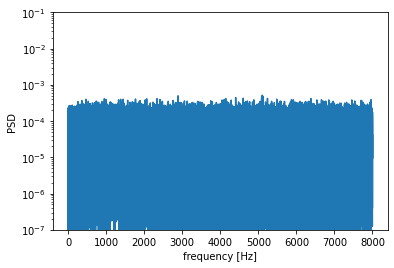

In [ ]:
IPython.display.display(ipd.Audio(data=x, rate=fs))

f, Pxx_den = signal.periodogram(x, fs)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e-1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.show()

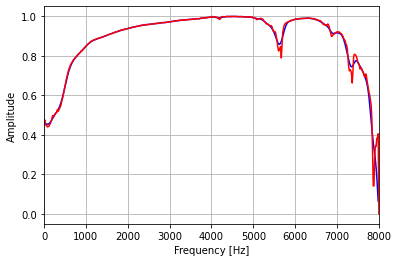

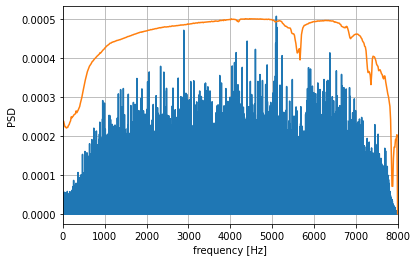

In [ ]:
filenames = ['Kaolinite_clean.txt',
             'Kaolinite_1.5_clean.txt',
             'Kieserite_clean.txt',
             'Kieserite_1.5_clean.txt',
             'Magnesite_clean.txt',
             'Magnesite_1.5_clean.txt',
             'Nontronite_clean.txt',
             'Nontronite_1.5_clean.txt',
             'Olivine_clean.txt',
             'Olivine_1.5_clean.txt',
             'Pyroxene_clean.txt',
             'Pyroxene_1.5_clean.txt']

filename = filenames[0]

# load file
ff, fw = load_file('data2/' + filename, fs)

# design filter
b, a = design_filter(ff, fw, fs, n)

# compare frequency responses
w, h = signal.freqz(b, a, fs=fs)
plt.plot(w, abs(h), 'b', ff, fw, 'r')
plt.xlim(0, fs/2)
plt.grid()
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]');
plt.show()

# filter noise
y = signal.lfilter(b, a, x)

IPython.display.display(ipd.Audio(data=y, rate=fs))

f, Pxx_den = signal.periodogram(y, fs)
plt.plot(f, Pxx_den, ff, .5*1e-3*fw)
plt.xlim(0, fs/2)
plt.grid()
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.show()